Processing c = 3.00
Processing c = 3.01
Processing c = 3.02
Processing c = 3.03
Processing c = 3.04
Processing c = 3.05
Processing c = 3.06
Processing c = 3.07
Processing c = 3.08
Processing c = 3.09
Processing c = 3.10
Processing c = 3.11
Processing c = 3.12
Processing c = 3.13
Processing c = 3.14
Processing c = 3.15
Processing c = 3.16
Processing c = 3.17
Processing c = 3.18
Processing c = 3.19
Processing c = 3.20
Processing c = 3.21
Processing c = 3.22
Processing c = 3.23
Processing c = 3.24
Processing c = 3.25
Processing c = 3.26
Processing c = 3.27
Processing c = 3.28
Processing c = 3.29
Processing c = 3.30
Processing c = 3.31
Processing c = 3.32
Processing c = 3.33
Processing c = 3.34
Processing c = 3.35
Processing c = 3.36
Processing c = 3.37
Processing c = 3.38
Processing c = 3.39
Processing c = 3.40
Processing c = 3.41
Processing c = 3.42
Processing c = 3.43
Processing c = 3.44
Processing c = 3.45
Processing c = 3.46
Processing c = 3.47
Processing c = 3.48
Processing c = 3.49


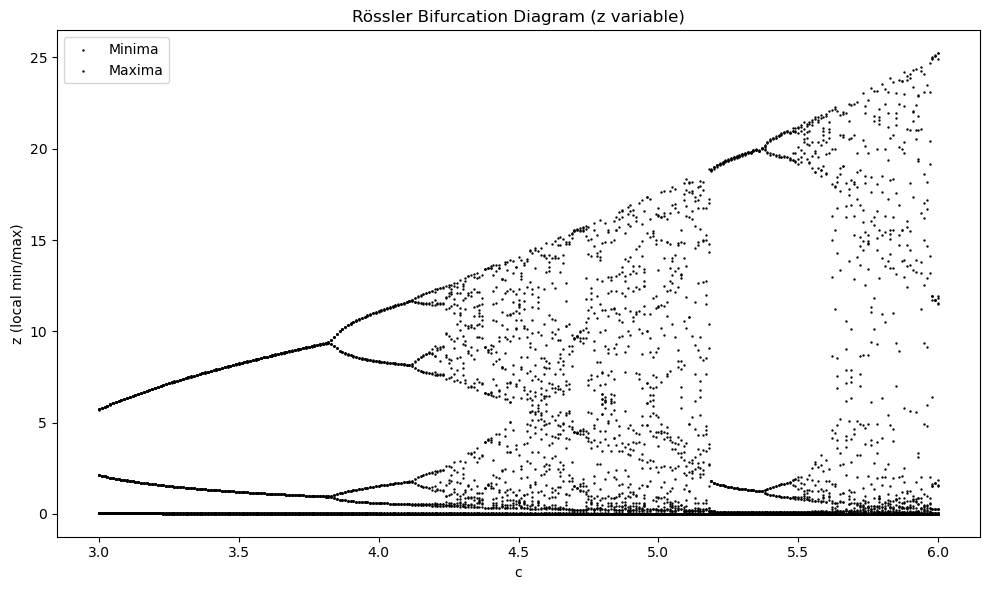

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.integrate import solve_ivp
from scipy.signal import argrelextrema

###True system bifurcation diagram generation###

# Rössler system definition
def rossler(t, state, a, b, c):
    x, y, z = state
    dxdt = -y - z
    dydt = x + a * y
    dzdt = b + z * (x - c)
    return [dxdt, dydt, dzdt]

# Parameters
a = 0.2
b = 0.2
c_values = np.arange(3, 6.01, 0.01)
initial_state = [-4.0, -4.0, 0.0]
t_warmup = np.linspace(0, 900, 2001)
t_analysis = np.linspace(900, 1000, 2001)

minima_c = []
minima_z = []
maxima_c = []
maxima_z = []

for c in c_values:
    print(f"Processing c = {c:.2f}")
    # Warmup
    sol_warmup = solve_ivp(
        rossler, [t_warmup[0], t_warmup[-1]], initial_state,
        args=(a, b, c), t_eval=t_warmup, rtol=1e-8, atol=1e-10
    )
    state_after_warmup = sol_warmup.y[:, -1]

    # Analysis
    sol_analysis = solve_ivp(
        rossler, [t_analysis[0], t_analysis[-1]], state_after_warmup,
        args=(a, b, c), t_eval=t_analysis, rtol=1e-8, atol=1e-10
    )
    z = sol_analysis.y[2]

    # Find local minima and maxima
    min_idx = argrelextrema(z, np.less)[0]
    max_idx = argrelextrema(z, np.greater)[0]

    minima_c.extend([c] * len(min_idx))
    minima_z.extend(z[min_idx])
    maxima_c.extend([c] * len(max_idx))
    maxima_z.extend(z[max_idx])

# Plot bifurcation diagram for the true system
plt.figure(figsize=(10, 6))
plt.scatter(minima_c, minima_z, color='black', s=0.5, label='Minima')
plt.scatter(maxima_c, maxima_z, color='black', s=0.5, label='Maxima')
plt.xlabel('c')
plt.ylabel('z (local min/max)')
plt.title('Rössler Bifurcation Diagram (z variable)')
plt.legend()
plt.tight_layout()
plt.show()

In [13]:
import torch
# Save the bifurcation data for later use
bifurcation_data = {
    "minima_c": minima_c,
    "minima_z": minima_z,
    "maxima_c": maxima_c,
    "maxima_z": maxima_z,
    "c_values": c_values.tolist(),
    "t_warmup": t_warmup.tolist(),
    "t_analysis": t_analysis.tolist()
}
torch.save(bifurcation_data, "rossler_bifurcation_data.pth")
print("Bifurcation data saved to 'rossler_bifurcation_data.pth'")

Bifurcation data saved to 'rossler_bifurcation_data.pth'


C:\Users\tegel009\AppData\Local\Temp\ipykernel_19212\2579328283.py:12: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to this experimental feature.
  norm_stats = torch.load("rossler_normalization_stats.pth

Processing c = 3.00
Processing c = 3.01
Processing c = 3.02
Processing c = 3.03
Processing c = 3.04
Processing c = 3.05
Processing c = 3.06
Processing c = 3.07
Processing c = 3.08
Processing c = 3.09
Processing c = 3.10
Processing c = 3.11
Processing c = 3.12
Processing c = 3.13
Processing c = 3.14
Processing c = 3.15
Processing c = 3.16
Processing c = 3.17
Processing c = 3.18
Processing c = 3.19
Processing c = 3.20
Processing c = 3.21
Processing c = 3.22
Processing c = 3.23
Processing c = 3.24
Processing c = 3.25
Processing c = 3.26
Processing c = 3.27
Processing c = 3.28
Processing c = 3.29
Processing c = 3.30
Processing c = 3.31
Processing c = 3.32
Processing c = 3.33
Processing c = 3.34
Processing c = 3.35
Processing c = 3.36
Processing c = 3.37
Processing c = 3.38
Processing c = 3.39
Processing c = 3.40
Processing c = 3.41
Processing c = 3.42
Processing c = 3.43
Processing c = 3.44
Processing c = 3.45
Processing c = 3.46
Processing c = 3.47
Processing c = 3.48
Processing c = 3.49


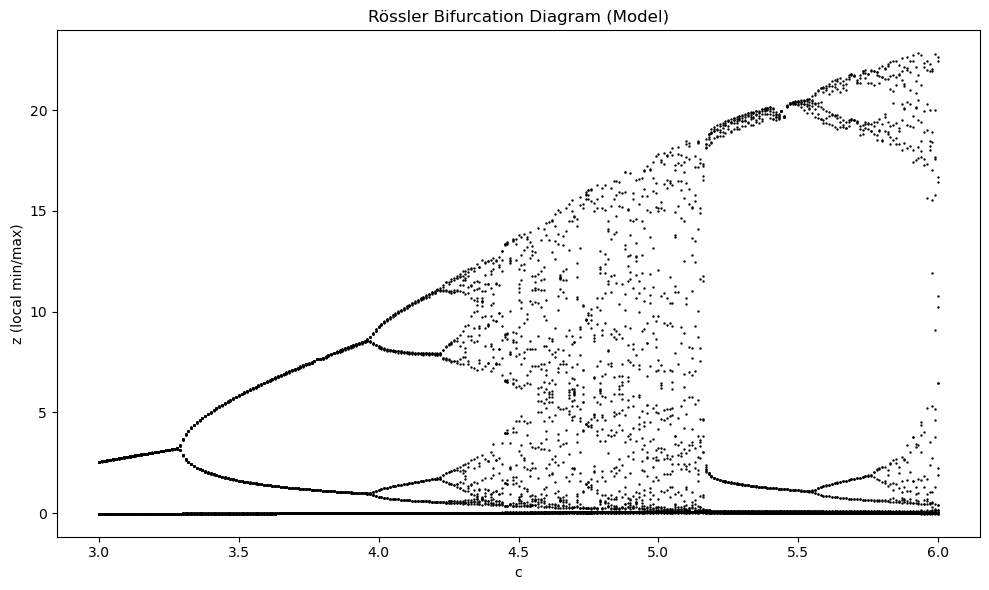

In [ ]:
import torch
from torchdiffeq import odeint
import numpy as np
import matplotlib.pyplot as plt
from scipy.signal import argrelextrema

from neuralode import Neuralode  # adjust import if needed

### Model-based bifurcation diagram generation ###

# --- Load normalization stats and model ---
folder = "runs/Best_combo1_232"  # <-- set your folder here
model_path = f"{folder}/model.pth"
norm_stats = torch.load("rossler_normalization_stats.pth")
x_mean = norm_stats["xyz_mean"]
x_std = norm_stats["xyz_std"]
c_mean = norm_stats["c_mean"]
c_std = norm_stats["c_std"]

# --- Model setup ---
device = torch.device("cpu")
n_vars = 3
n_drivers = 1
hidden_layers = 3  # set to your training config
depth = 16         # set to your training config

# Dummy parameter list for initialization (will be overwritten)
dummy_c = torch.zeros(1)
model = Neuralode(n_vars, n_drivers, parameter_list=dummy_c, hidden_layers=hidden_layers, depth_of_layers=depth).to(device)
model.load_state_dict(torch.load(model_path, map_location=device))
model.eval()

# --- Bifurcation diagram parameters ---
c_values = np.arange(3, 6.01, 0.01)
initial_state = np.array([-4.0, -4.0, 0.0], dtype=np.float32)
t_warmup = np.linspace(0, 900, 2001)
t_analysis = np.linspace(900, 1000, 2001)

minima_c = []
minima_z = []
maxima_c = []
maxima_z = []

for c in c_values:
    print(f"Processing c = {c:.2f}")
    # Normalize c and initial state
    c_tensor = torch.tensor([c], dtype=torch.float32)
    c_norm = (c_tensor - c_mean) / c_std
    init_state_tensor = torch.tensor(initial_state, dtype=torch.float32)
    init_state_norm = (init_state_tensor - x_mean) / x_std

    # Warmup
    model.parameter_list = c_norm
    with torch.no_grad():
        warmup_traj = odeint(model, init_state_norm.unsqueeze(0), torch.tensor(t_warmup, dtype=torch.float32), method='rk4',options={'step_size': 0.1})
    state_after_warmup = warmup_traj[-1, 0, :]  # last state

    # Analysis
    with torch.no_grad():
        analysis_traj = odeint(model, state_after_warmup.unsqueeze(0), torch.tensor(t_analysis, dtype=torch.float32), method='rk4',options={'step_size': 0.1})
    traj_denorm = analysis_traj.squeeze(1) * x_std + x_mean  # shape: [len(t_analysis), 3]
    z = traj_denorm[:, 2].cpu().numpy()

    # Find local minima and maxima
    min_idx = argrelextrema(z, np.less)[0]
    max_idx = argrelextrema(z, np.greater)[0]

    minima_c.extend([c] * len(min_idx))
    minima_z.extend(z[min_idx])
    maxima_c.extend([c] * len(max_idx))
    maxima_z.extend(z[max_idx])

# --- Plot bifurcation diagram ---
plt.figure(figsize=(10, 6))
plt.scatter(minima_c, minima_z, color='black', s=0.5, label='Minima')
plt.scatter(maxima_c, maxima_z, color='black', s=0.5, label='Maxima')
plt.xlabel('c')
plt.ylabel('z (local min/max)')
plt.title('Rössler Bifurcation Diagram (Model)')
plt.tight_layout()
plt.show()

In [3]:
# Save the bifurcation data for later use
bifurcation_data = {
    "minima_c": minima_c,
    "minima_z": minima_z,
    "maxima_c": maxima_c,
    "maxima_z": maxima_z,
    "c_values": c_values.tolist(),
    "t_warmup": t_warmup.tolist(),
    "t_analysis": t_analysis.tolist()
}
torch.save(bifurcation_data, "rossler_bifurcation_node.pth")
print("Bifurcation data saved to 'rossler_bifurcation_data.pth'")

Bifurcation data saved to 'rossler_bifurcation_data.pth'


C:\Users\tegel009\AppData\Local\Temp\ipykernel_19212\1639550916.py:5: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to this experimental feature.
  data_true = torch.load("rossler_bifurcation_data.pth")
C:

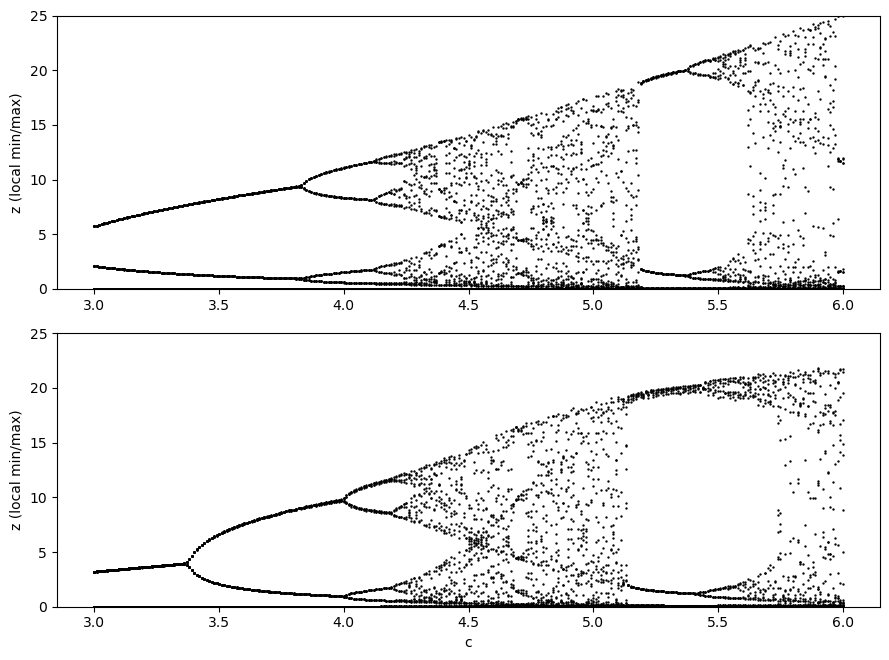

In [ ]:
import torch
import matplotlib.pyplot as plt

###Showcase both systems in the same figure

# Load the bifurcation data
data_true = torch.load("rossler_bifurcation_data.pth")
data_model = torch.load("rossler_bifurcation_node.pth")

fig, axs = plt.subplots(2, 1, figsize=(9, 6.7), sharex=False)

# Plot true system
axs[0].scatter(data_true["minima_c"], data_true["minima_z"], color='black', s=0.5, label='Minima')
axs[0].scatter(data_true["maxima_c"], data_true["maxima_z"], color='black', s=0.5, label='Maxima')
axs[0].set_ylabel('z (local min/max)')
axs[0].set_ylim(0, 25)

# Plot model
axs[1].scatter(data_model["minima_c"], data_model["minima_z"], color='black', s=0.5, label='Minima')
axs[1].scatter(data_model["maxima_c"], data_model["maxima_z"], color='black', s=0.5, label='Maxima')
axs[1].set_xlabel('c')
axs[1].set_ylabel('z (local min/max)')
axs[1].set_ylim(0, 25)

plt.tight_layout()
plt.savefig("rossler_bifurcation_comparison.png", dpi=300, transparent=True)
plt.show()
